<a href="https://colab.research.google.com/github/pascalghanimi/Injury-Prediction-in-Runners/blob/main/Ensemble_XGBoost_LightGBM_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [2]:
# Data extraction
import pickle

with open("features.pkl", "rb") as f:
  features = pickle.load(f)

with open("features_days.pkl", "rb") as f:
  features_days = pickle.load(f)

with open("features_weeks.pkl", "rb") as f:
  features_weeks = pickle.load(f)

with open("features_objective.pkl", "rb") as f:
  features_objective = pickle.load(f)

with open("features_subjective.pkl", "rb") as f:
  features_subjective = pickle.load(f)

with open("labels.pkl", "rb") as f:
  labels = pickle.load(f)

print(features[0][0]) # first athlete first row
print(features_days[0][0])
print(features_weeks[0])
print(labels[0])

print(len(features[0][0])) # amount of features

[ 0.77523982  0.48379555 -0.34174298  1.12482238  4.65573275 -0.30257114
 -0.36195376  1.13221076  0.88408664  0.98946749 -1.07576228 -0.58780279
 -0.34515758 -0.21498604 -0.25818757 -0.30257114 -0.36653747 -1.10832632
 -1.12373205 -1.11938273  0.76147321 -0.58880824 -0.33963599 -0.22015974
 -0.26519341  3.1128211  -0.36131219  0.94306135  0.88408664  0.88198911
 -1.08073515 -0.58890474 -0.33382237 -0.21223522 -0.26471133 -0.29617444
 -0.36131219 -1.10795815 -1.12373205 -1.11942205  0.7667035  -0.5913292
 -0.33382237 -0.22367068 -0.26509659 -0.29617444  2.42402301  0.57403001
  0.88989186  0.9965464   0.78053094  2.39956507  5.70866175 -0.21223522
 -0.26519341  3.3763886  -0.35067995  1.13636789  0.88989186  0.88771258
  0.78584128 -0.58219763 -0.3393889  -0.21762941 -0.25818757 -0.28968273
  2.19131074  0.96442407  0.89572629  0.67074481  0.37283858 -0.47040001
 -0.01179093  0.73505066  1.36358038  0.5749299   0.54093582  1.26319022
  2.68987335 -0.05530893  0.11981333  1.16084473  1.

In [3]:
import numpy as np

X = np.vstack([features[athlete_id] for athlete_id in features])
X_days = np.vstack([features_days[athlete_id] for athlete_id in features_days])
X_weeks = np.vstack([features_weeks[athlete_id] for athlete_id in features_weeks])
X_objective = np.vstack([features_objective[athlete_id] for athlete_id in features_objective])
X_subjective = np.vstack([features_subjective[athlete_id] for athlete_id in features_subjective])

Y = np.hstack([labels[athlete_id] for athlete_id in labels])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_train_days, X_temp_days, Y_train_days, Y_temp_days = train_test_split(X_days, Y, test_size=0.3, random_state=42)
X_val_days, X_test_days, Y_val_days, Y_test_days = train_test_split(X_temp_days, Y_temp_days, test_size=0.5, random_state=42)

X_train_weeks, X_temp_weeks, Y_train_weeks, Y_temp_weeks = train_test_split(X_weeks, Y, test_size=0.3, random_state=42)
X_val_weeks, X_test_weeks, Y_val_weeks, Y_test_weeks = train_test_split(X_temp_weeks, Y_temp_weeks, test_size=0.5, random_state=42)

X_train_subjective, X_temp_subjective, Y_train_subjective, Y_temp_subjective = train_test_split(X_subjective, Y, test_size=0.3, random_state=42)
X_val_subjective, X_test_subjective, Y_val_subjective, Y_test_subjective = train_test_split(X_temp_subjective, Y_temp_subjective, test_size=0.5, random_state=42)

X_train_objective, X_temp_objective, Y_train_objective, Y_temp_objective = train_test_split(X_objective, Y, test_size=0.3, random_state=42)
X_val_objective, X_test_objective, Y_val_objective, Y_test_objective = train_test_split(X_temp_objective, Y_temp_objective, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(X_train_days.shape, X_val_days.shape, X_test_days.shape)
print(X_train_weeks.shape, X_val_weeks.shape, X_test_weeks.shape)
print(X_train_subjective.shape, X_val_subjective.shape, X_test_subjective.shape)
print(X_train_objective.shape, X_val_objective.shape, X_test_objective.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(29876, 139) (6402, 139) (6402, 139)
(29876, 70) (6402, 70) (6402, 70)
(29876, 69) (6402, 69) (6402, 69)
(29876, 48) (6402, 48) (6402, 48)
(29876, 91) (6402, 91) (6402, 91)
(29876,) (6402,) (6402,)


In [6]:
import joblib
xgb_models = joblib.load("xgb_models.pkl")
lgbm_models = joblib.load("lgbm_models.pkl")
cb_models = joblib.load("cb_models.pkl")
print(xgb_models)
print(lgbm_models)
print(cb_models)

all_models = xgb_models + lgbm_models + cb_models
print(all_models)

[CalibratedClassifierCV(cv='prefit',
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.8742599879102873,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                  

In [7]:
import numpy
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

def ensemble_pred(models, X):
  probas = np.stack([m.predict_proba(X)[:, 1] for m in models])
  weights = np.array([roc_auc_score(Y_test, p) **3 for p in probas])
  return np.average(probas, axis=0, weights=weights)

Y_pred = ensemble_pred(all_models, X_test)
auc = roc_auc_score(Y_test, Y_pred)
print(f"Finale Ensemble Test-AUC: {auc:.4f}")


Finale Ensemble Test-AUC: 0.7299


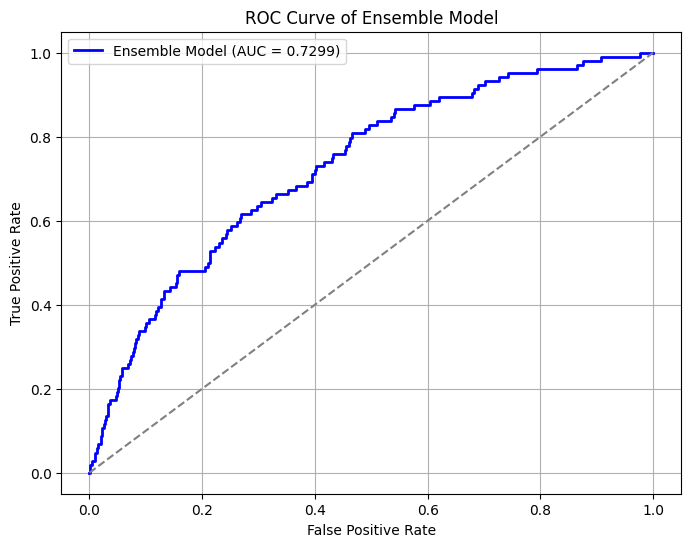

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Berechnung der ROC-Kurve
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

# Plot der ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Ensemble Model (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonale als Referenz
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Ensemble Model")
plt.legend()
plt.grid()
plt.show()
